In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [21]:
def labelName(x):
    if (x == "BENIGN"):
        return "normal"
    else:
        return "anomaly"

In [22]:
dataset = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')

#dataset = dataset[:500000]

dataset['Flow Bytes/s'] = dataset['Flow Bytes/s'].apply(float)

dataset[' Flow Packets/s'] = dataset[' Flow Packets/s'].apply(float)

le = LabelEncoder()

dataset['Flow ID'] = le.fit_transform(dataset['Flow ID'])
dataset[' Source IP'] = le.fit_transform(dataset[' Source IP'])
dataset[' Timestamp'] = le.fit_transform(dataset[' Timestamp'])
dataset[' Destination IP'] = le.fit_transform(dataset[' Destination IP'])

dataset[' Label'] = dataset[' Label'].apply(labelName)

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(axis=1, inplace=True)

/home/tatjana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
X = dataset.loc[:, dataset.columns != ' Label']
y = dataset[' Label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
detector = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=10)),
            ('core', SVC(verbose=True))
            #('normalizer', Normalizer()),
            #('core', OneClassSVM(verbose=True, gamma='auto'))
            #('core', SVC(verbose=True, C=10, gamma=0.0001))
        ])

In [26]:
detector.fit(X_train, y_train)

/home/tatjana/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('core',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=True))],
         verbose=False)

In [52]:
predictions = detector.predict(X_test)

In [28]:
print(confusion_matrix(y_test,predictions))

[[  3583    983]
 [    41 142543]]


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     anomaly       0.99      0.78      0.87      4566
      normal       0.99      1.00      1.00    142584

    accuracy                           0.99    147150
   macro avg       0.99      0.89      0.94    147150
weighted avg       0.99      0.99      0.99    147150



In [8]:
'''
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.best_params_
grid.fit(X_train, y_train)
'''

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

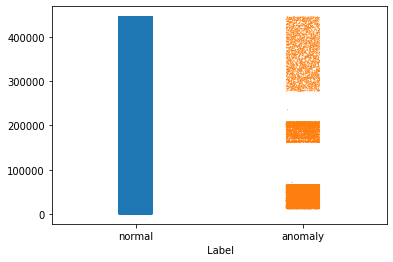

In [34]:
sns.stripplot(data=dataset, y=dataset.index, x=' Label', size = 1)

In [53]:
pred = pd.DataFrame(predictions, columns=['predicted'])

In [57]:
pred.head()

,predicted
0,normal
1,normal
2,normal
3,normal
4,normal


In [113]:
source_dataset.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' 

In [124]:
source_dataset = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')
source_dataset[' Label'] = source_dataset[' Label'].apply(labelName)

source_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
source_dataset.dropna(axis=1, inplace=True)

/home/tatjana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [129]:
ip_sorted = common[common[' Label'] == 'anomaly'][' Source IP'].value_counts(sort=True, ascending=False)
ip_sorted = pd.DataFrame(ip_sorted)
ip_sorted.reset_index(inplace=True)
ip_sorted.columns = ['source IP', 'count of anomaly packets']

In [130]:
ip_sorted

,source IP,count of anomaly packets
0,172.16.0.1,13835


In [108]:
ip_sorted = common[common['predicted'] == 'anomaly'][' Destination Protoc'].value_counts(sort=True, ascending=False)
ip_sorted = pd.DataFrame(ip_sorted)
ip_sorted.reset_index(inplace=True)
ip_sorted.columns = ['source IP', 'count of anomaly packets']

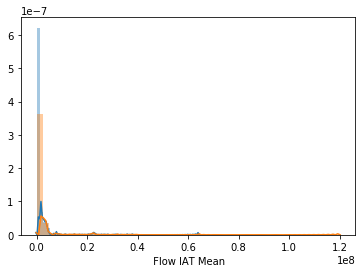

In [121]:
sns.distplot(common[common['predicted'] == 'anomaly'][' Flow IAT Mean'])
sns.distplot(common[common['predicted'] == 'normal'][' Flow IAT Mean'])

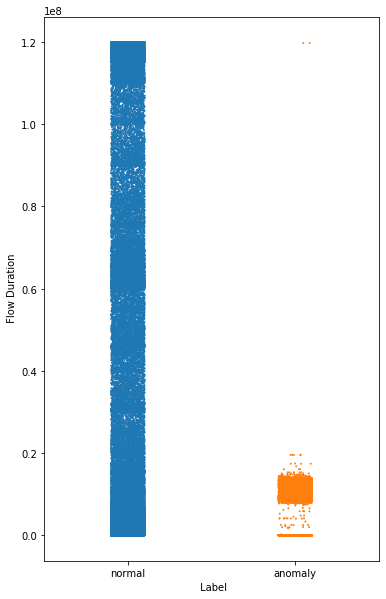

In [132]:
#plt.ylim(0, 10000)
fig = plt.figure(figsize=(6, 10))
sns.stripplot(x=' Label', y = ' Flow Duration', data=source_dataset, size=2)

In [85]:
ip_sorted.head()

,IP,count of anomaly packets
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [70]:
common[common['predicted'] == 'anomaly'][' Destination Port'].value_counts(sort=True, ascending=False)

53       1079
443      1056
80        632
21        192
123        84
22         36
137        20
465        12
139        10
138         9
5353        7
0           5
88          5
389         4
51812       3
55982       2
3268        2
52330       2
54444       2
51811       2
49666       2
54599       2
52006       2
51255       2
54273       2
50202       2
56395       1
50390       1
54288       1
41971       1
         ... 
52184       1
49901       1
43752       1
49891       1
51816       1
39414       1
53757       1
53759       1
55816       1
53793       1
55846       1
51764       1
49719       1
55868       1
51806       1
51814       1
55922       1
56016       1
51838       1
53891       1
55940       1
4753        1
55954       1
49813       1
39580       1
51890       1
29377       1
53959       1
2760        1
53263       1
Name:  Destination Port, Length: 474, dtype: int64